In [43]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [44]:
# Remove below data directory 'cell_images' before move to git
# For POC 'cell_images' folder contain train/test data used,
# which is removed for sharing due to large amount of images
data_dir = 'cell_images'

In [45]:
os.listdir(data_dir)

['test', 'train']

In [46]:
# Specify test and train path
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [47]:
# Check directory in train_path
os.listdir(train_path)

['parasitized', 'uninfected']

In [48]:
# Check single from directory
p_c_9 = os.listdir(train_path + 'parasitized')[9]
para_cell = train_path + 'parasitized' + '/' + p_c_9

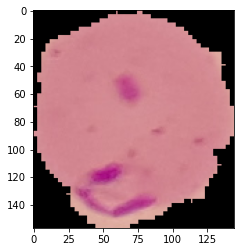

In [49]:
plt.imshow(imread(para_cell))
plt.show()

In [50]:
# Print total images in each folder
print(len(os.listdir(train_path + 'parasitized')))
print(len(os.listdir(train_path + 'uninfected')))
print(len(os.listdir(test_path + 'parasitized')))
print(len(os.listdir(test_path + 'uninfected')))

12480
12480
1300
1300


In [51]:
# Check mean dimention for images and fix image shape for model
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'parasitized'):
    img = imread(test_path + 'parasitized' + '/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
np.mean(dim2)

133.31846153846155

In [52]:
image_shape = (130, 130, 1)

In [53]:
# Create model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy']
             )

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [56]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [57]:
image_gen = ImageDataGenerator(
                                rotation_range=20, # rotate the image 20 degrees
                                width_shift_range=0.10, # Shift the pic width by a max of 5%
                                height_shift_range=0.10, # Shift the pic height by a max of 5%
                                rescale=1/255, # Rescale the image by normalzing it.
                                shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                                zoom_range=0.1, # Zoom in by 10% max
                                horizontal_flip=True, # Allo horizontal flipping
                                fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

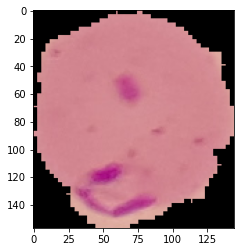

In [58]:
plt.imshow(imread(para_cell))
plt.show()

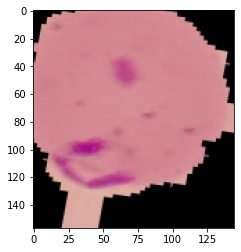

In [59]:
plt.imshow(image_gen.random_transform(imread(para_cell)))
plt.show()

In [60]:
batch_size = 16

In [61]:
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
)

Found 24958 images belonging to 2 classes.


In [62]:
test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2600 images belonging to 2 classes.


In [63]:
warnings.filterwarnings('ignore')

In [64]:
results = model.fit_generator(
    train_image_gen,
    epochs=20,
    validation_data=test_image_gen,
    callbacks=[early_stop]
)

# model = load_model('malaria_detector.h5')
model.save('malaria_detector_grayscale.h5')

Epoch 1/20
1560/1560 [==============================] - 1140s 730ms/step - loss: 0.6836 - accuracy: 0.5438 - val_loss: 0.2796 - val_accuracy: 0.9112
Epoch 2/20
1560/1560 [==============================] - 1310s 840ms/step - loss: 0.2405 - accuracy: 0.9164 - val_loss: 0.1942 - val_accuracy: 0.9381
Epoch 3/20
1560/1560 [==============================] - 853s 547ms/step - loss: 0.1971 - accuracy: 0.9347 - val_loss: 0.1865 - val_accuracy: 0.9335
Epoch 4/20
1560/1560 [==============================] - 876s 562ms/step - loss: 0.1921 - accuracy: 0.9387 - val_loss: 0.1827 - val_accuracy: 0.9362
Epoch 5/20
1560/1560 [==============================] - 893s 572ms/step - loss: 0.1840 - accuracy: 0.9380 - val_loss: 0.1813 - val_accuracy: 0.9377
Epoch 6/20
1560/1560 [==============================] - 968s 621ms/step - loss: 0.1837 - accuracy: 0.9395 - val_loss: 0.1698 - val_accuracy: 0.9388
Epoch 7/20
1560/1560 [==============================] - 1007s 646ms/step - loss: 0.1703 - accuracy: 0.9425 - v

In [65]:
model.evaluate(test_image_gen)

163/163 [==============================] - 35s 215ms/step - loss: 0.1726 - accuracy: 0.9415


[0.17260845005512238, 0.9415384531021118]

In [66]:
pred = model.predict_generator(test_image_gen)

In [67]:
predictions = pred > 0.5

In [68]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



# Thank You